Ссылка на материалы:  [пдф тут](https://drive.google.com/file/d/16Cm2tgrpuDH8eIdxdSYyOsfDPqnJ3byd/view?usp=sharing)

## Задание 1. HTTP-запросы, ответы и погода

Описание:

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API.

Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





In [ ]:
pip install requests

In [ ]:
import requests as req
from datetime import datetime


def send_request(url):
    response = req.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        None


def clear_data(data):
    date = datetime.today().date()
    day_ = date.day
    month_ = date.month
    date = f'{day_}.{month_}'

    temperature = data['current']['temperature_2m']
    temperature_format = data['current_units']['temperature_2m']

    weather_code = data['current']['weather_code']
    weather_bad = [51, 53, 55, 56, 57, 61, 63, 65, 66, 67, 71, 73, 75, 77, 80, 81, 82, 85, 86]
    if weather_code in [0, 1]:
        message = 'без осадков, ясно'
    elif weather_code == 45:
        message = 'без осадков, туман'
    elif weather_code in weather_bad:
        message = 'осадки, без тумана'
    else:
        message = 'Кирпич в помощь'

    message = f'Сегодня ({date}) погода {temperature} {temperature_format}, {message}'

    return message


def main():
    cordinates = input('Введите ваши кродинаты:').split(', ')
    url = f'https://api.open-meteo.com/v1/forecast?latitude={cordinates[0]}&longitude={cordinates[1]}&current=temperature_2m,weather_code&timezone=auto&forecast_days=1'
    data = send_request(url)
    print(clear_data(data))


if __name__ == '__main__':
    main()

Введите ваши кродинаты:56.50, 60.35
Сегодня (10.11) погода -2.5 °C, осадки, без тумана


## Задание 2. HTTP-запросы, ответы и покемоны

**Описание:**


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
import requests as req


def send_request(url):
    response = req.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        None


def list_name_pokemon(data):
    respones_list = []
    list_name = []
    for respones in send_request(data)['results']:
        respones_list.append(respones)
    for datas in respones_list:
        list_name.append(datas['name'])
    print(list_name)


def pokemon_stats(name):
    url_pokemon = f'https://pokeapi.co/api/v2/pokemon/{name}/'
    stats_pokemon = {}
    stats_pokemon['Name'] = str(name)
    stats_pokemon['Type'] = send_request(url_pokemon)['types']
    stats_pokemon['Weight'] = send_request(url_pokemon)['weight']
    stats_pokemon['Height'] = send_request(url_pokemon)['height']
    stats_pokemon['Abilities'] = send_request(url_pokemon)['abilities']
    return stats_pokemon


def main():
    url_endpoint = 'https://pokeapi.co/api/v2/pokemon'
    list_name_pokemon(url_endpoint)
    name_pokemon = input('Имя покемона: ')
    pokemon_stats(name_pokemon)


if __name__ == '__main__':
    main()

['bulbasaur', 'ivysaur', 'venusaur', 'charmander', 'charmeleon', 'charizard', 'squirtle', 'wartortle', 'blastoise', 'caterpie', 'metapod', 'butterfree', 'weedle', 'kakuna', 'beedrill', 'pidgey', 'pidgeotto', 'pidgeot', 'rattata', 'raticate']
Имя покемона: clefairy


{'Name': 'clefairy',
 'Type': [{'slot': 1,
   'type': {'name': 'fairy', 'url': 'https://pokeapi.co/api/v2/type/18/'}}],
 'Weight': 75,
 'Height': 6,
 'Abilities': [{'ability': {'name': 'cute-charm',
    'url': 'https://pokeapi.co/api/v2/ability/56/'},
   'is_hidden': False,
   'slot': 1},
  {'ability': {'name': 'magic-guard',
    'url': 'https://pokeapi.co/api/v2/ability/98/'},
   'is_hidden': False,
   'slot': 2},
  {'ability': {'name': 'friend-guard',
    'url': 'https://pokeapi.co/api/v2/ability/132/'},
   'is_hidden': True,
   'slot': 3}]}

## Задание 3. HTTP-запросы, ответы и посты

**Описание:**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

1. Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

2. Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

3. Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль

In [ ]:
def send_request(url):
    response = req.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f'Response code: {response.status_code}')
        None


def id_send_request(id):
    data = send_request('https://jsonplaceholder.typicode.com/posts')
    for id_message in data:
        if id == id_message['id']:
            print(id_message['title'],'\n','\n',id_message['body'])

id_send_request(7)

magnam facilis autem 
 
 dolore placeat quibusdam ea quo vitae
magni quis enim qui quis quo nemo aut saepe
quidem repellat excepturi ut quia
sunt ut sequi eos ea sed quas


## Задание 4. HTTP-запросы, ответы и работа с постами

**Описание**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
import requests as req


def send_request(url):
    response = req.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        None


def new_post():
    title = input()
    body = input()
    userid = input()
    url = 'https://jsonplaceholder.typicode.com/posts'
    data = {
        'userId': userid,
        'title': title,
        'body': body
    }
    response = req.post(url, data)
    return response.json()


def replace_post():
    id_post = input()
    new_title = input()
    new_body = input()
    url = f'https://jsonplaceholder.typicode.com/posts/{id_post}'
    new_data = {
        'id': id_post,
        'title': new_title,
        'body': new_body
    }
    response = req.put(url, data = new_data)
    print(response.status_code)
    print(response.json())


def delete_post():
    url = ''
    id_post = input()
    response = req.delete(f'https://jsonplaceholder.typicode.com/posts/{id_post}')
    return response.status_code


replace_post()

3
er
43
200
{'id': 3, 'title': 'er', 'body': '43'}


## Задание 5. HTTP-запросы, ответы и пёсики

**Описание**

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


*Подсказка*



```
import requests
from PIL import Image
from IPython.display import display
import io

url = <____>
response = <____>
        
if response.<______> == <___>:
      image_url = response.json()['message']

res = requests.<__>(image_url)
img = Image.open(io.BytesIO(res.content))
display(img)
```



labrador


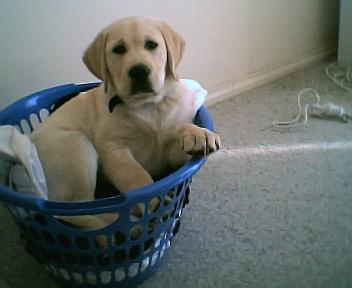

In [ ]:
import requests as req
from PIL import Image
from IPython.display import display


def list_all_dogs():
    url = 'https://dog.ceo/api/breeds/list/all'
    response = req.get(url)
    if response.status_code == 200:
        dict_dogs = {}
        list_dogs = []
        for dogs in response.json()['message']:
            list_dogs.append(dogs)
        for number in range(0,len(list_dogs)):
            dict_dogs[str(number+1)] = list_dogs[number]
        return dict_dogs
    else:
        print('Responce code:', response.status_code)


def image_dogs():
    dogs_name = list(map(str,input().split()))
    for dogs in dogs_name:
        url = f'https://dog.ceo/api/breed/{dogs}/images/random'
        responce = req.get(url)
        responce_img = responce.json()['message']
        responce = req.get(responce_img, stream=True).raw
        img = Image.open(responce)
        display(img)


image_dogs()